Import Necessary Libraries

In [7]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

*Read Dataset*

In [30]:
df =pd.read_csv('emails.csv')

In [31]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


C:\Users\HP-450-G3\AppData\Local\Temp\ipykernel_9976\2442135269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette='viridis')


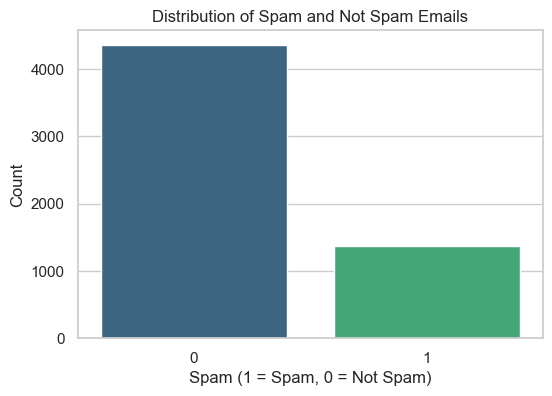

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='spam', data=df, palette='viridis')

# Title and labels
plt.title('Distribution of Spam and Not Spam Emails')
plt.xlabel('Spam (1 = Spam, 0 = Not Spam)')
plt.ylabel('Count')

# Show plot
plt.show()

In [34]:
spam_count = (df['spam'] == 1).sum()
ham_count = (df['spam'] == 0).sum()
print(f"Spam count: {spam_count}")
print(f"Ham count: {ham_count}")

Spam count: 1368
Ham count: 4360


Balance Dataset to overcome Bias

In [35]:
spam_df = df[df['spam'] == 1]
ham_df = df[df['spam'] == 0]

min_count = min(len(spam_df), len(ham_df))

spam_df = spam_df.sample(min_count, random_state=42)
ham_df = ham_df.sample(min_count, random_state=42)

df = pd.concat([spam_df, ham_df]).sample(frac=1, random_state=42)

C:\Users\HP-450-G3\AppData\Local\Temp\ipykernel_9976\793085749.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette='viridis')


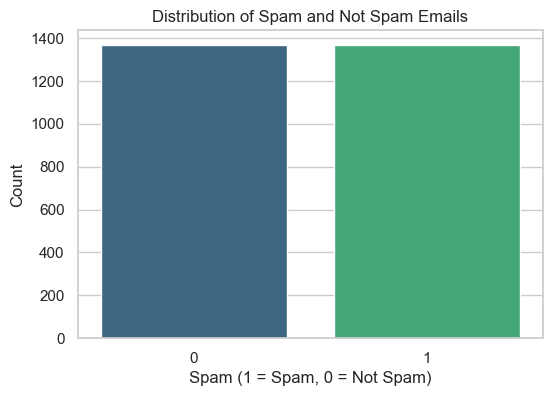

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='spam', data=df, palette='viridis')

# Title and labels
plt.title('Distribution of Spam and Not Spam Emails')
plt.xlabel('Spam (1 = Spam, 0 = Not Spam)')
plt.ylabel('Count')

# Show plot
plt.show()


In [37]:
spam_count = (df['spam'] == 1).sum()
ham_count = (df['spam'] == 0).sum()
print(f"Spam count: {spam_count}")
print(f"Ham count: {ham_count}")

Spam count: 1368
Ham count: 1368


**Preprocess Text**

In [38]:
def process_text(text):
    # Remove Email Addresses, links, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove links
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'^\s+|\s+?$', '', text)  # Remove leading and trailing whitespace
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [39]:
df['text'] = df['text'].apply(process_text)

Vectorize text and Train Diffrent Models

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
TfidfVectorizer = TfidfVectorizer()
X = TfidfVectorizer.fit_transform(df['text'])
y = df['spam']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
Naive_bayes = MultinomialNB()
Naive_bayes.fit(x_train, y_train)

MultinomialNB()

In [59]:
y_pred_NB = Naive_bayes.predict(x_test)
NB_classification = classification_report(y_test, y_pred_NB)
NB_confusion_matrix = confusion_matrix(y_test, y_pred_NB)
print("Naive Bayes Classification Report\n",NB_classification)
print("Naive Bayes Confusion Matrix\n", NB_confusion_matrix)


Naive Bayes Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       265
           1       1.00      0.98      0.99       283

    accuracy                           0.99       548
   macro avg       0.99      0.99      0.99       548
weighted avg       0.99      0.99      0.99       548

Naive Bayes Confusion Matrix
 [[264   1]
 [  6 277]]


In [60]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [61]:
y_pred_logistic = logistic_regression.predict(x_test)
Logistic_Classification = classification_report(y_test, y_pred_logistic)
Logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Logistic Regression Classification Report\n",Logistic_Classification)
print("Logistic Regression Confusion Matrix\n", Logistic_confusion_matrix)

Logistic Regression Classification Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       265
           1       0.97      1.00      0.98       283

    accuracy                           0.98       548
   macro avg       0.98      0.98      0.98       548
weighted avg       0.98      0.98      0.98       548

Logistic Regression Confusion Matrix
 [[255  10]
 [  1 282]]


In [62]:
SVM = SVC()
SVM.fit(x_train, y_train)

SVC()

In [63]:
y_pred_svm = SVM.predict(x_test)
SVM_classification = classification_report(y_test, y_pred_svm)
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print("SVM Classification Report\n",SVM_classification)
print("SVM Confusion Matrix\n", SVM_confusion_matrix)

SVM Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       265
           1       0.98      1.00      0.99       283

    accuracy                           0.99       548
   macro avg       0.99      0.99      0.99       548
weighted avg       0.99      0.99      0.99       548

SVM Confusion Matrix
 [[258   7]
 [  1 282]]


**Compare Accuracy**

In [65]:
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
logreg_report = classification_report(y_test, y_pred_logistic, output_dict=True)
nb_report = classification_report(y_test, y_pred_NB, output_dict=True)

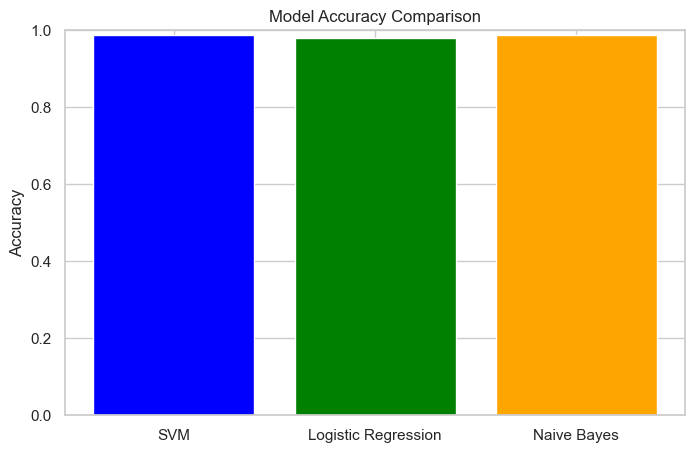

In [67]:
import matplotlib.pyplot as plt

# Extract accuracies
svm_accuracy = svm_report['accuracy']
logreg_accuracy = logreg_report['accuracy']
nb_accuracy = nb_report['accuracy']

# Create lists
models = ['SVM', 'Logistic Regression', 'Naive Bayes']
accuracies = [svm_accuracy, logreg_accuracy, nb_accuracy]

# Plotting
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Accuracy between 0 and 1
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


C:\Users\HP-450-G3\AppData\Local\Temp\ipykernel_9976\3170896676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Set2')


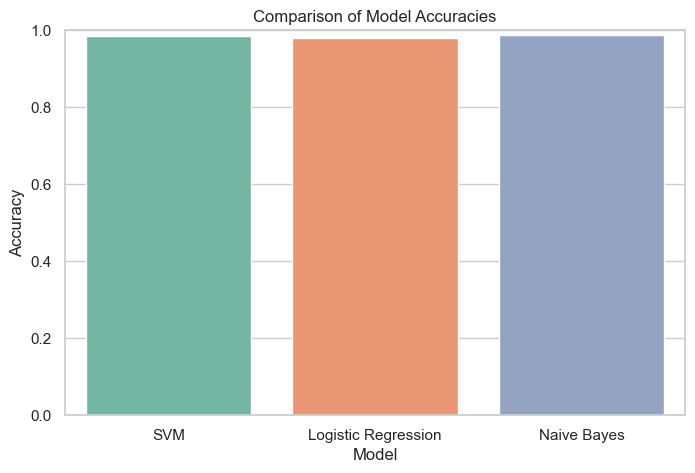

In [68]:
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Set2')
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()
